## We have taken the data from Feb 2015 to January 2016.This visualisation only for NIFTY data.


In [2]:
import pandas as pd
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
#%matplotlib auto
import numpy as np

In [3]:
data_nifty_15to16= get_history(symbol='NIFTY IT', start=date(2015,2,1),end = date(2016,1,31),index = True)
data_nifty_15to16.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-02-02,11871.35,11972.60,11847.80,11943.95,17272113,2.304050e+10
2015-02-03,11963.75,12000.65,11849.00,11963.90,21053605,1.770590e+10
2015-02-04,12027.10,12027.10,11902.35,11938.90,14453955,1.290570e+10
2015-02-05,11967.75,12295.35,11963.80,12165.15,15826989,2.124010e+10
2015-02-06,12190.70,12380.45,12186.95,12267.95,11167848,1.325990e+10


In [4]:
data_nifty_15to16.to_csv('nifty_data.csv')
print('Saved successfully')

Saved successfully


In [5]:
data = pd.read_csv('nifty_data.csv')
data.head(10)

,Date,Open,High,Low,Close,Volume,Turnover
0,2015-02-02,11871.35,11972.60,11847.80,11943.95,17272113,2.304050e+10
1,2015-02-03,11963.75,12000.65,11849.00,11963.90,21053605,1.770590e+10
2,2015-02-04,12027.10,12027.10,11902.35,11938.90,14453955,1.290570e+10
3,2015-02-05,11967.75,12295.35,11963.80,12165.15,15826989,2.124010e+10
4,2015-02-06,12190.70,12380.45,12186.95,12267.95,11167848,1.325990e+10
5,2015-02-09,12160.90,12285.45,12160.90,12249.30,10996415,1.221010e+10
6,2015-02-10,12215.20,12297.75,12129.65,12162.85,17687306,1.851870e+10
7,2015-02-11,12198.45,12265.70,12149.35,12243.40,12905131,1.363700e+10
8,2015-02-12,12277.20,12397.00,12253.05,12372.00,16012381,1.515950e+10
9,2015-02-13,12369.60,12506.70,12353.25,12464.95,12674963,1.527350e+10


In [9]:
data.describe()

,Open,High,Low,Close,Volume,Turnover
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,2.470000e+02
mean,11557.009717,11628.034615,11463.059717,11541.173077,1.350329e+07,1.308786e+10
std,492.317302,498.196870,484.480848,489.505870,6.383054e+06,5.227792e+09
min,10730.650000,10850.250000,10646.550000,10790.350000,7.952400e+05,8.272000e+08
25%,11163.350000,11221.375000,11081.450000,11144.375000,9.054204e+06,9.134950e+09
50%,11445.650000,11527.750000,11351.050000,11429.800000,1.163284e+07,1.222450e+10
75%,11878.100000,11998.000000,11764.125000,11878.875000,1.638024e+07,1.613300e+10
max,12885.750000,12908.100000,12635.500000,12855.900000,4.461970e+07,3.685160e+10


In [10]:
data.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Turnover    float64
dtype: object

In [11]:
print('Lets convert Date object time into date time ')
data['Date']=pd.to_datetime(data['Date'])

Lets convert Date object time into date time 


In [13]:
data.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Turnover           float64
dtype: object

### for filling holiday values.

### Lets set Date column as index

In [14]:
data.set_index('Date',inplace = True)

# Univariet analysis..like histogram, line plot,box plot

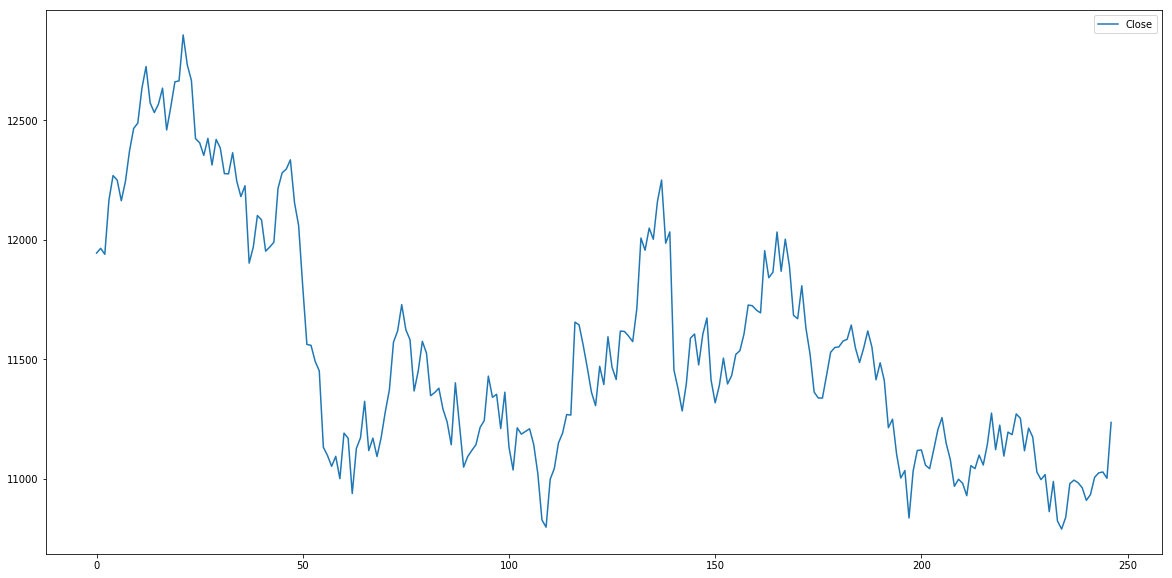

In [6]:
plt.figure(figsize = (20,10))
data['Close'].plot(kind = 'line',legend = 'Low')

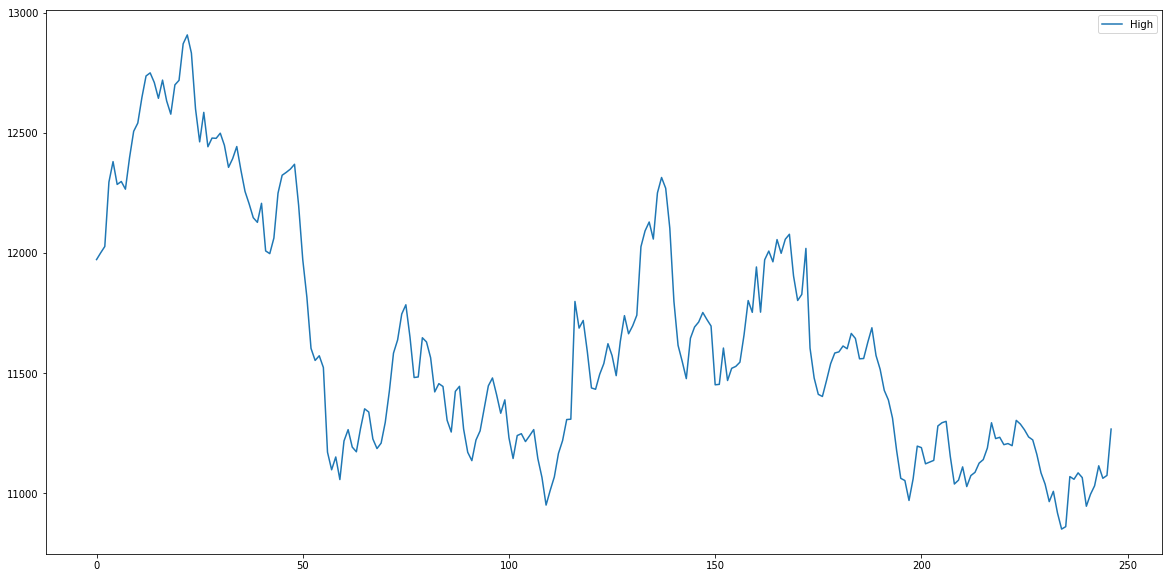

In [7]:
plt.figure(figsize = (20,10))
data['High'].plot(kind = 'line',legend = 'Low')

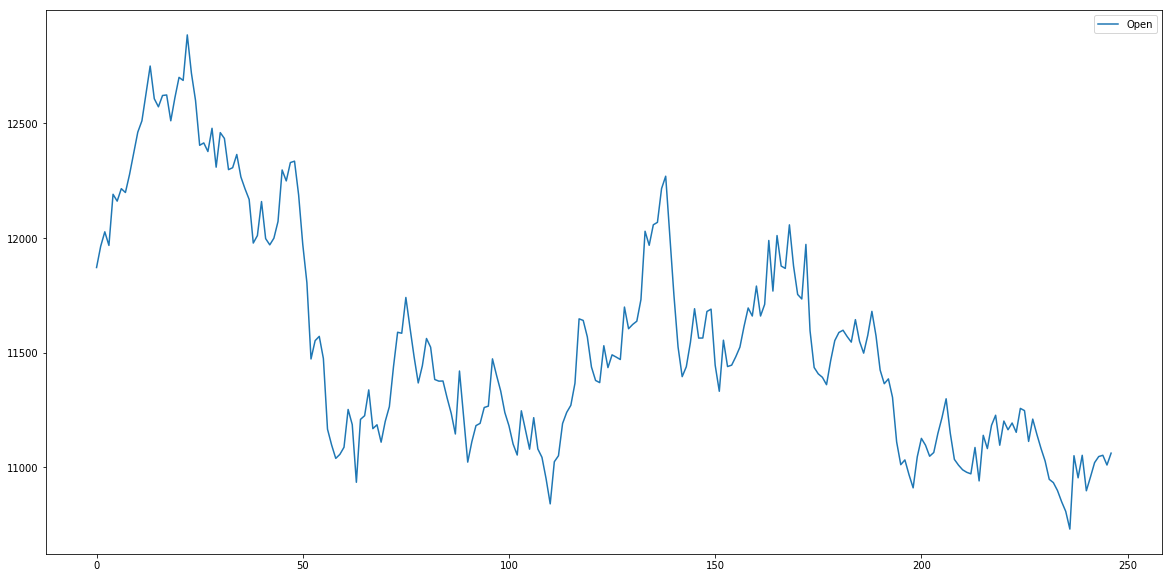

In [8]:
plt.figure(figsize = (20,10))
data['Open'].plot(kind = 'line',legend = 'Low')

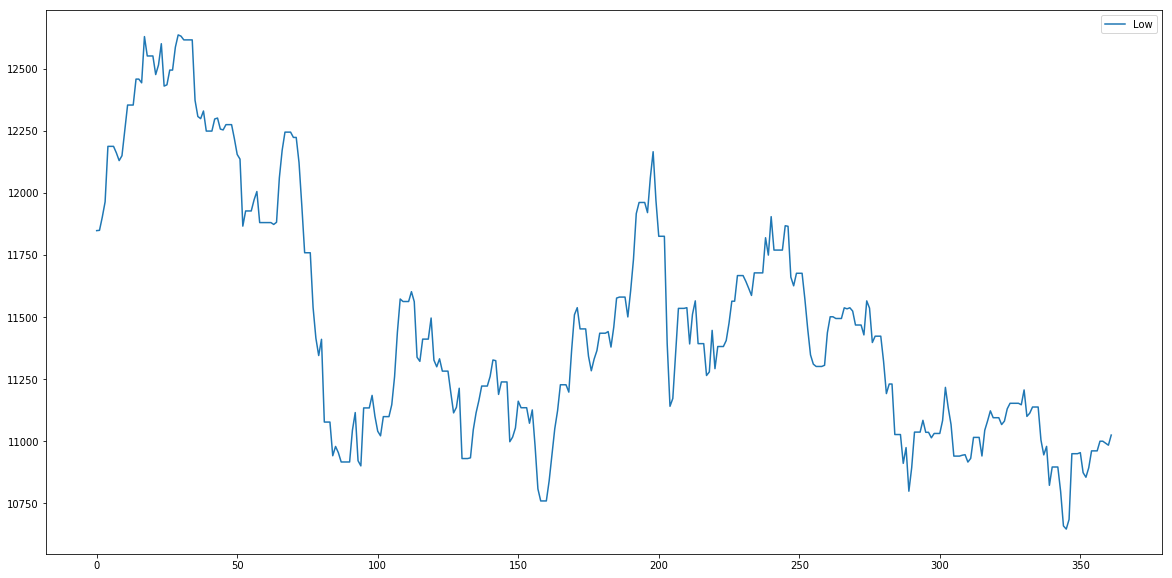

In [40]:
plt.figure(figsize = (20,10))
data['Low'].plot(kind = 'line',legend = 'Low')

### Lets add them together

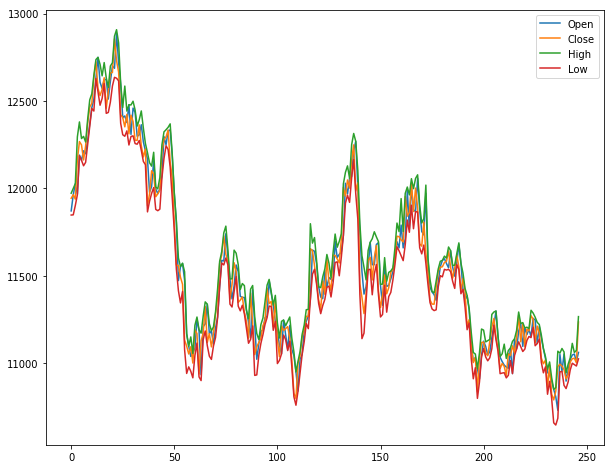

In [10]:
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
#plt.figure(figsize = (18,11))
data['Open'].plot(kind = 'line',legend = 'Open')
data['Close'].plot(kind = 'line',legend = 'Close')
data['High'].plot(kind = 'line',legend = 'High')
data['Low'].plot(kind = 'line',legend = 'Low')


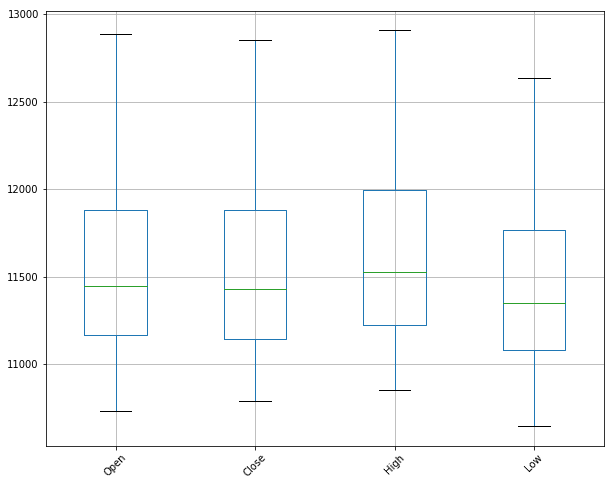

In [11]:
data.boxplot(column = ['Open','Close','High','Low'],rot = 45)

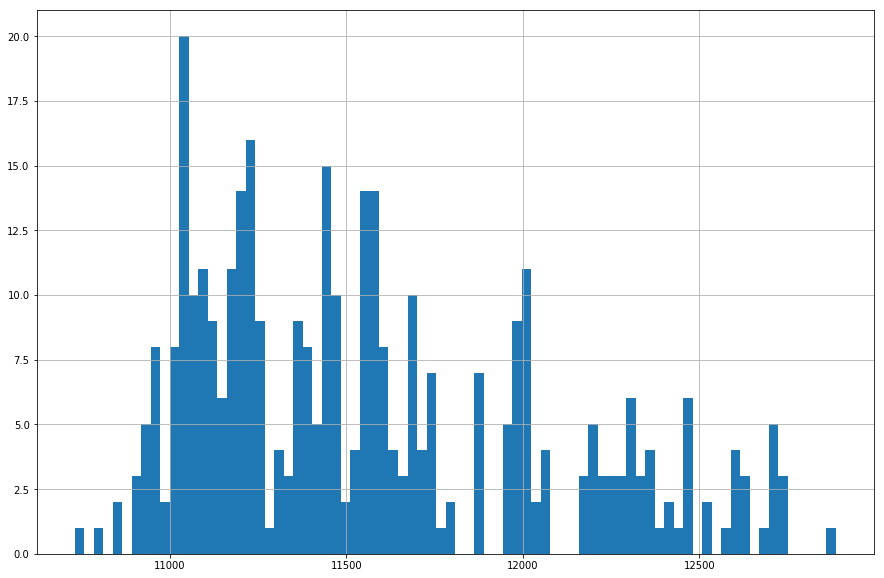

In [46]:
#data['Open'].plot(kind = 'hist')
data['Open'].hist(bins =80,figsize=(15,10))

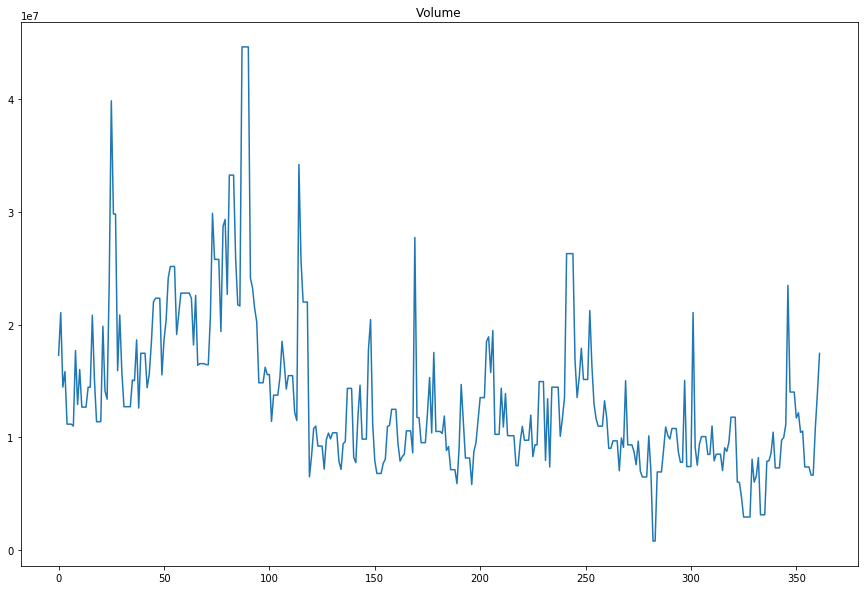

In [52]:
plt.figure(figsize = (15,10))
ax =data['Volume'].plot(kind = 'line',title = 'Volume')

# Bivariate analysis...like scatter plot 

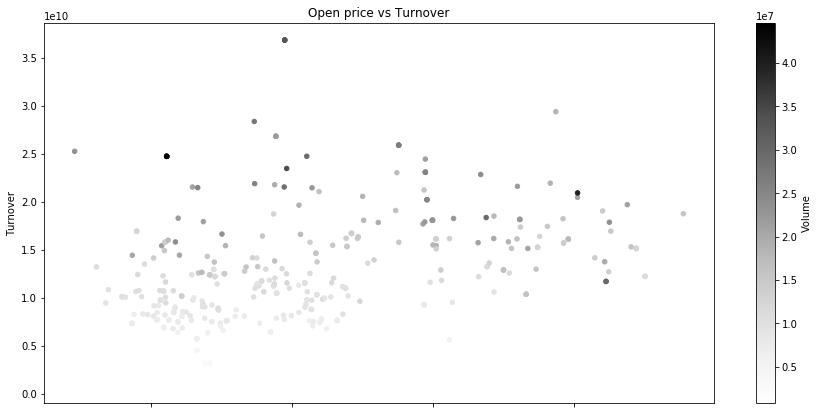

In [56]:
data.plot.scatter(x ='Open', y ='Turnover',c = 'Volume',title = 'Open price vs Turnover',figsize=(15,7) )
#data.plot.scatter(x ='Open', y ='Volume',c ='DarkBlue' )

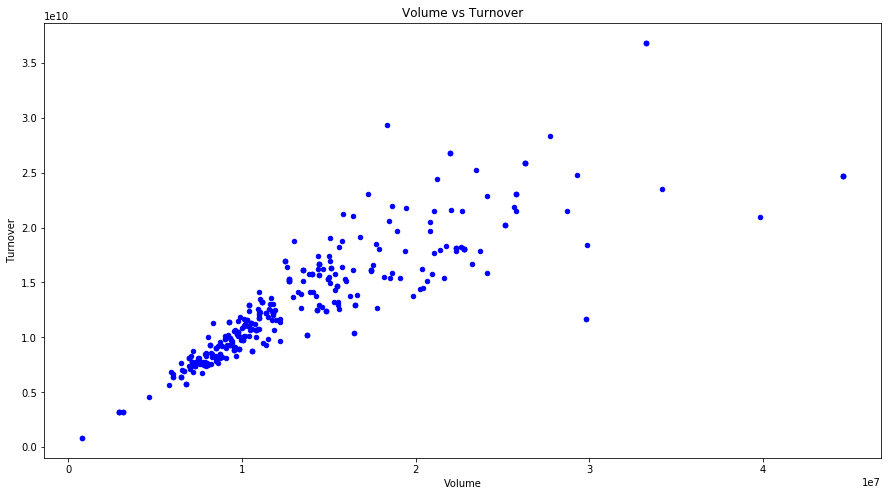

In [57]:
data.plot.scatter(x= 'Volume',y='Turnover', c ='b',title = 'Volume vs Turnover',figsize = (15,8))
#pe = get_index_pe_history('NIFTY', date(2000, 1, 1), date(2017, 10, 31))

In [ ]:
### return Log shift

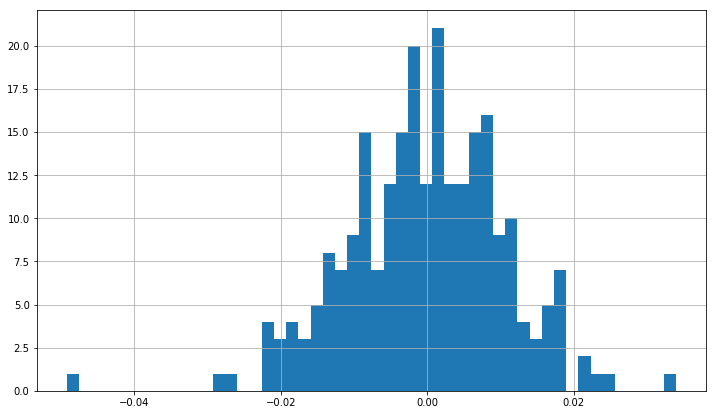

In [13]:
daily_log_return_shift = np.log(data['Close']/data['Close'].shift(1))
daily_log_return_shift.hist(bins = 50,figsize = (12,7))


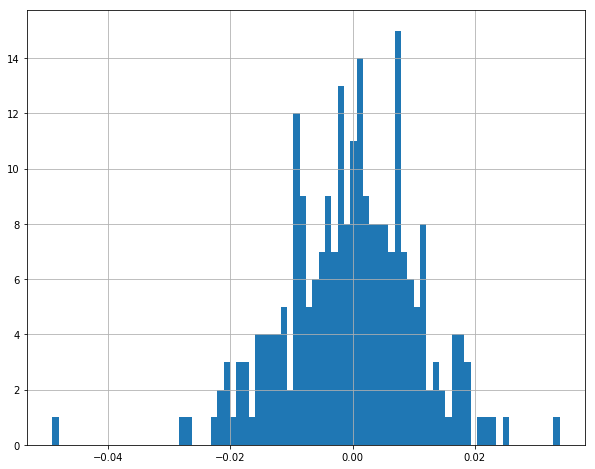

In [14]:
daily_log_return_shift.hist(bins = 80)


In [67]:
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

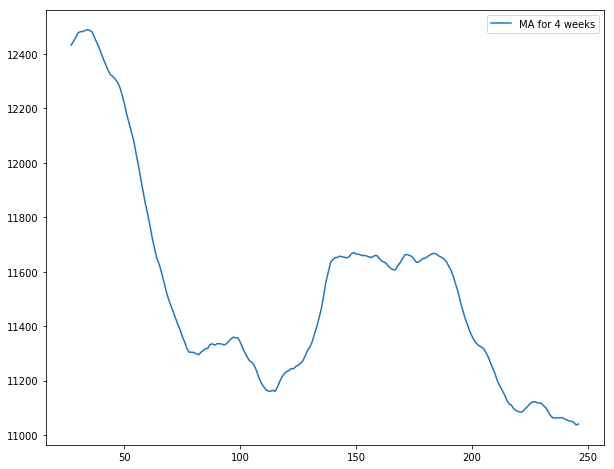

In [15]:
mov_avg_4 = data['Close'].rolling(4*7).mean()
plt.plot(mov_avg_4,label = 'MA for 4 weeks')
plt.legend(loc = 'best')

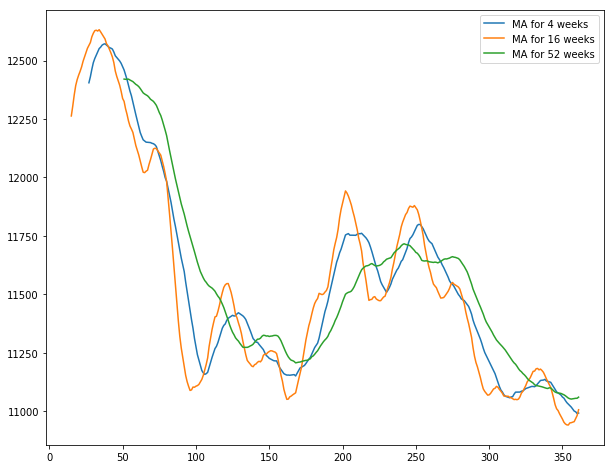

In [71]:

mov_avg_4 = data['Close'].rolling(4*7).mean()
plt.plot(mov_avg_4,label = 'MA for 4 weeks')
plt.legend(loc = 'best')

mov_avg_16 = data['Close'].rolling(16).mean()
plt.plot(mov_avg_16,label = 'MA for 16 weeks')
plt.legend(loc = 'best')

mov_avg_52 = data['Close'].rolling(52).mean()
plt.plot(mov_avg_52,label = 'MA for 52 weeks')
plt.legend(loc = 'best')

### Wow we know as Rolling size increase Smoothing increase...

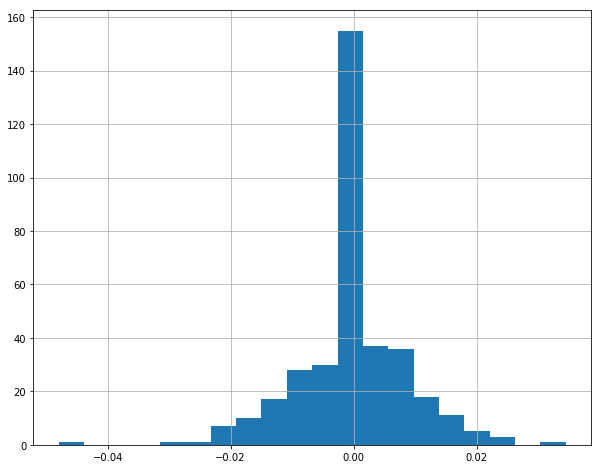

In [75]:
data['Close'].pct_change().hist(bins = 20)

# 2nd Question

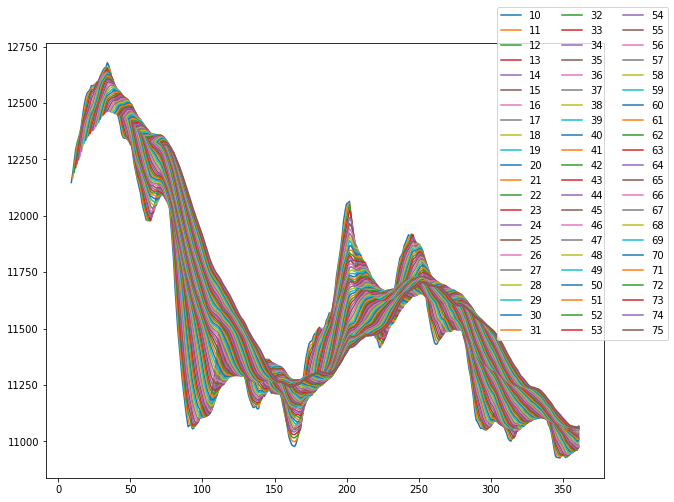

In [77]:
for i in range(10,76):
    ax=data['Close'].rolling(window = i).mean().plot()
    #df.plot(kind='bar', ax=ax)
    ax.legend([str(i) for i in range(10,76)],ncol=3,loc='center left', bbox_to_anchor=(.8, 0.7))
